# PCA on Dataset with 5000 samples

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
import cv2
from scipy.stats import stats
import matplotlib.image as mpimg
import math
import os

In [2]:
# import data

data = []
PATH_TO_DATA = 'Training_set'

for filename in os.listdir(PATH_TO_DATA):
        img = cv2.imread(os.path.join(PATH_TO_DATA,filename), cv2.IMREAD_GRAYSCALE)
        data.append(img)

# data scaling

data = np.array(data)
data = (data - np.mean(data))/np.std(data)

In [3]:
# helpful functions for PCA

def apply_pca(data, n_components):
    '''Apply pca on feature matrix X with n_components desired components.''' 

    X = data.reshape(data.shape[0], data.shape[1]*data.shape[2]) # our feature matrix
    print(f'Before PCA, we have {X.shape[0]} samples, each with {X.shape[1]} features')
    
    pca = PCA(n_components) # initialize PCA
    pca.fit(X) # fit to data
    X_pca = pca.transform(X) # transform data
    imgs_reduced = pca.inverse_transform(X_pca) # get reduced images
    imgs_reduced = imgs_reduced.reshape(data.shape)
    
    print(f'After PCA, we have {X.shape[0]} samples, each with {X_pca.shape[1]} features')
    return X_pca, imgs_reduced, pca


def plot_explained_variance(pca):
    '''Plot the explained variance ratio of the given PCA for 0 to number of components.'''
    plt.grid()
    plt.plot(np.cumsum(pca.explained_variance_ratio_ * 100))
    plt.xlabel('Number of components')
    plt.ylabel('Explained variance')
    plt.tight_layout()
    

def visualize_img_reduction(data, imgs_reduced):
    # showing sample image
    img_grey_1 = data[0]
    img_grey_2 = data[1]
    img_reduced_1 = imgs_reduced[0]
    img_reduced_2 = imgs_reduced[1]

    fig, axs = plt.subplots(2,2, sharex=True, sharey=True, figsize = (12,12))
    axs[0,0].imshow(img_grey_1)
    axs[0,1].imshow(img_reduced_1)

    axs[1,0].imshow(img_grey_2)
    axs[1,1].imshow(img_reduced_2)

    axs[0,0].set_title('Image 1 Original')
    axs[0,1].set_title('Image 1 Reduced')
    axs[1,0].set_title('Image 2 Original')
    axs[1,1].set_title('Image 2 Reduced')

    plt.show()

Before PCA, we have 5000 samples, each with 20480 features
After PCA, we have 5000 samples, each with 100 features


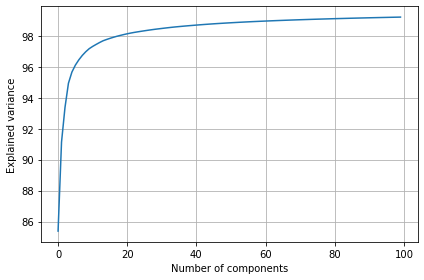

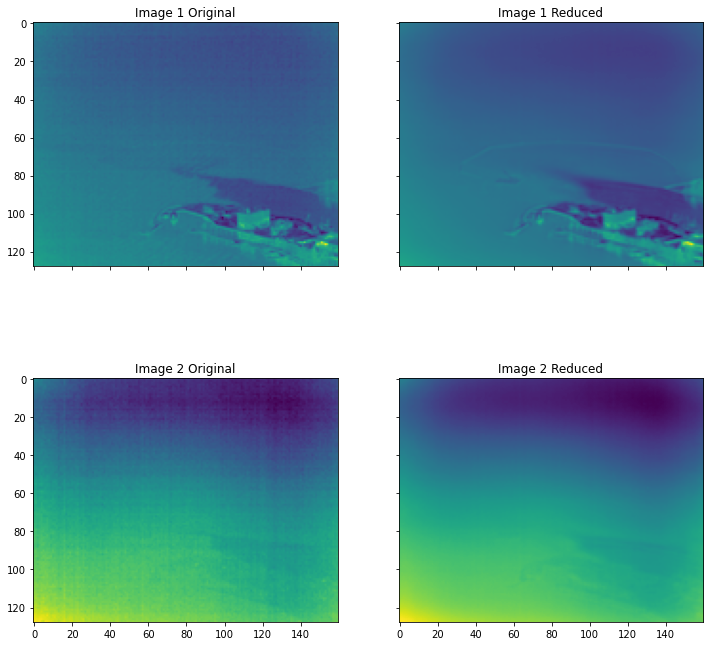

Before PCA, we have 5000 samples, each with 20480 features
After PCA, we have 5000 samples, each with 150 features


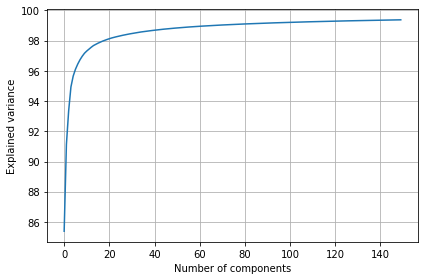

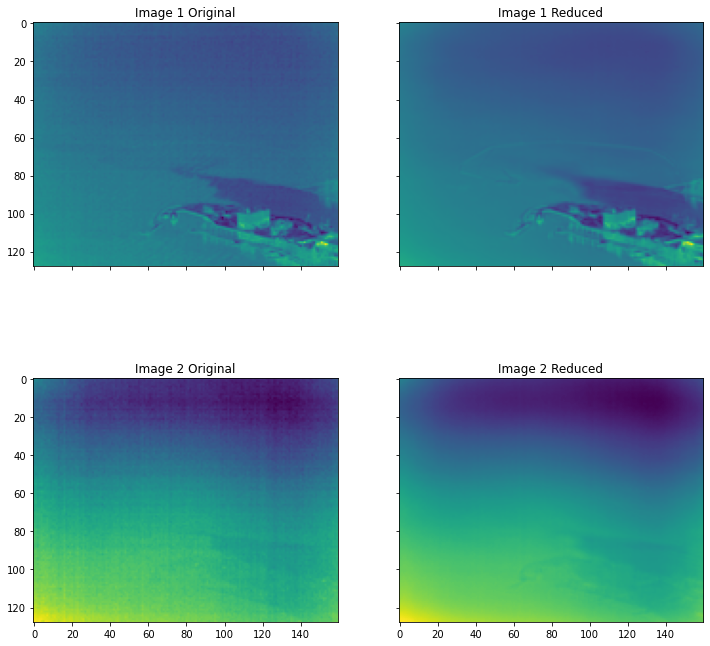

In [4]:
component_array = [100,150]
for n_components in component_array:
    X_pca, imgs_reduced, pca = apply_pca(data, n_components)
    plot_explained_variance(pca)
    visualize_img_reduction(data, imgs_reduced)

In [38]:
def create_labels_dict(num_clusters, labels):
    labels_dict = {}
    for cluster in range(num_clusters):
        cluster_ids = np.array([idx for idx, elem in enumerate(labels) if (labels[idx] == cluster)])
        labels_dict[cluster] = cluster_ids
    return labels_dict

def plot_cluster_examples(num_examples, num_clusters, labels, imgs_reduced):
    num_columns = 4
    num_rows = -(num_examples//-num_columns)

    for cluster in range(num_clusters):
        cluster_ids = np.array([idx for idx, elem in enumerate(labels) if (labels[idx] == cluster)])
        cluster_examples = np.random.choice(cluster_ids, size = num_examples, replace = False)

        fig, axs = plt.subplots(num_rows,num_columns, sharex=True, sharey=True, figsize = (5*num_columns, 4*num_rows))
        axs = axs.flatten()
        for ax, example in zip(axs, cluster_examples):
            ax.imshow(imgs_reduced[example],cmap='gray')
            ax.set_title(f'Image {example}')
        fig.suptitle(f'Cluster {cluster}')
        plt.tight_layout()

# Attempt kmeans

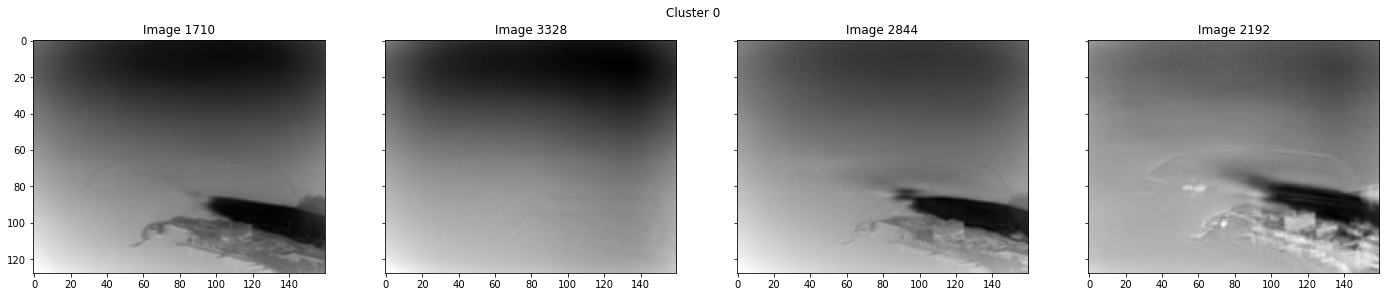

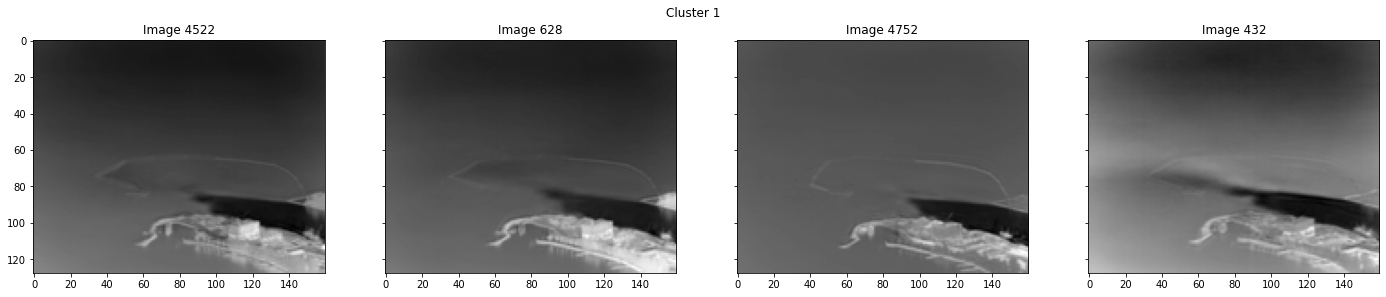

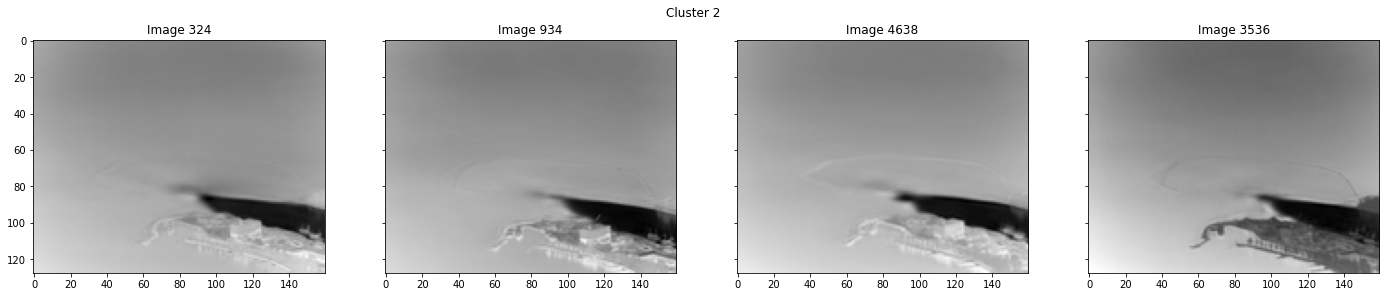

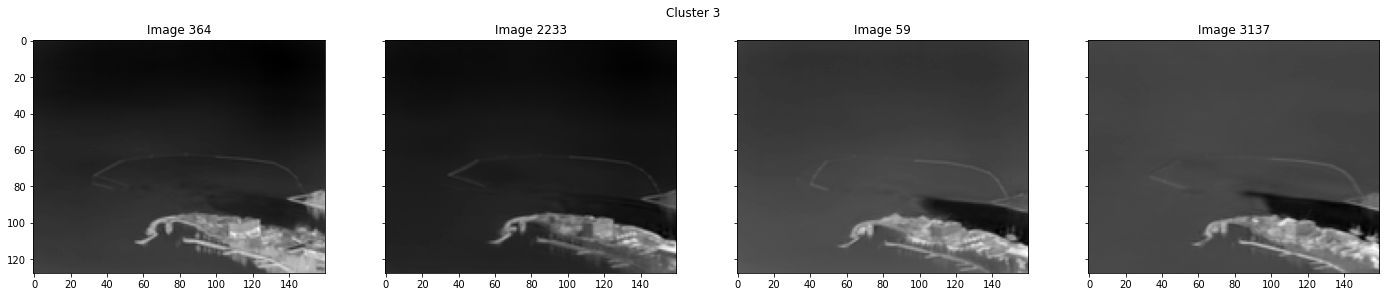

In [39]:
num_clusters = 4
num_examples = 4
kmeans = KMeans(n_clusters=num_clusters, init = 'random').fit(X_pca)
labels = kmeans.predict(X_pca)
labels_dict = create_labels_dict(num_clusters, labels)
plot_cluster_examples(num_examples, num_clusters, labels, imgs_reduced)

# Attempt DBSCAN

In [64]:
# Create a list of eps

for epsilon in np.arange(0.1,1,0.5):
    for min_samp in np.linspace(2,10,10):
        labels = DBSCAN(eps=epsilon, min_samples = min_samp).fit_predict(X_pca)
        unique, counts = np.unique(labels, return_counts = True)
        print(f'Epsilon: {epsilon}, Minimum Samples: {min_samp}, Clusters: {counts.shape}')

Epsilon: 0.1, Minimum Samples: 2.0, Clusters: (13,)
Epsilon: 0.1, Minimum Samples: 2.888888888888889, Clusters: (1,)
Epsilon: 0.1, Minimum Samples: 3.7777777777777777, Clusters: (1,)
Epsilon: 0.1, Minimum Samples: 4.666666666666666, Clusters: (1,)
Epsilon: 0.1, Minimum Samples: 5.555555555555555, Clusters: (1,)
Epsilon: 0.1, Minimum Samples: 6.444444444444445, Clusters: (1,)
Epsilon: 0.1, Minimum Samples: 7.333333333333333, Clusters: (1,)
Epsilon: 0.1, Minimum Samples: 8.222222222222221, Clusters: (1,)
Epsilon: 0.1, Minimum Samples: 9.11111111111111, Clusters: (1,)
Epsilon: 0.1, Minimum Samples: 10.0, Clusters: (1,)
Epsilon: 0.6, Minimum Samples: 2.0, Clusters: (13,)
Epsilon: 0.6, Minimum Samples: 2.888888888888889, Clusters: (1,)
Epsilon: 0.6, Minimum Samples: 3.7777777777777777, Clusters: (1,)
Epsilon: 0.6, Minimum Samples: 4.666666666666666, Clusters: (1,)
Epsilon: 0.6, Minimum Samples: 5.555555555555555, Clusters: (1,)
Epsilon: 0.6, Minimum Samples: 6.444444444444445, Clusters: (1,

In [59]:
np.arange(0,1,0.5)

array([0. , 0.5])

In [65]:

labels = DBSCAN(eps=1.5, min_samples = 2).fit_predict(X_pca)
unique, counts = np.unique(labels, return_counts = True)

In [66]:
counts


array([4976,    2,    2,    2,    2,    2,    2,    2,    2,    2,    2,
          2,    2])